In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# image path
image_path = 'images/NoisyImage1.tif'

# read image
img = cv.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


Image shape: (512, 512, 3)
Image Gray Shape: (512, 512)


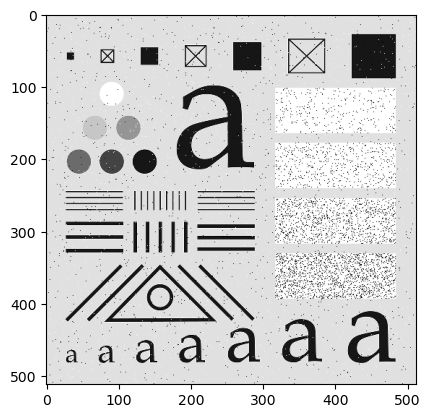

In [4]:
# Display the image
print("Image shape:", img.shape)

img_gry = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


print("Image Gray Shape:", img_gry.shape)
# Convert the image from BGR to RGB color space
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

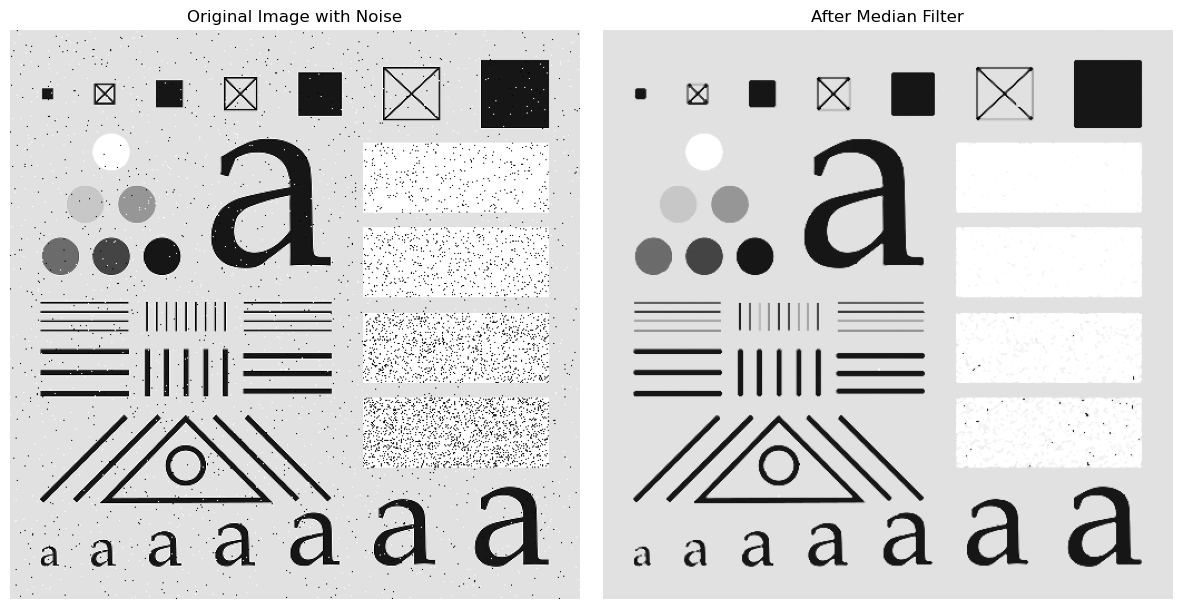

In [21]:
# Apply median filter with kernel size 3x3
filtered_img = cv.medianBlur(img_gry, 3)

# Create figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(121)
plt.imshow(img_gry, cmap='gray')
plt.title('Original Image with Noise')
plt.axis('off')

# Plot filtered image
plt.subplot(122)
plt.imshow(filtered_img, cmap='gray')
plt.title('After Median Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

Edge Detection

In [23]:
# Approach 1: Sobel Edge Detection
def sobel_edge_detection(image):
    # Compute gradients
    sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    
    # Compute magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Normalize
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    return magnitude

# Approach 2: Canny Edge Detection
def canny_edge_detection(image):
    # Apply Gaussian blur to reduce noise
    blurred = cv.GaussianBlur(image, (5,5), 0)
    
    # Apply Canny
    edges = cv.Canny(blurred, threshold1=100, threshold2=200)
    return edges


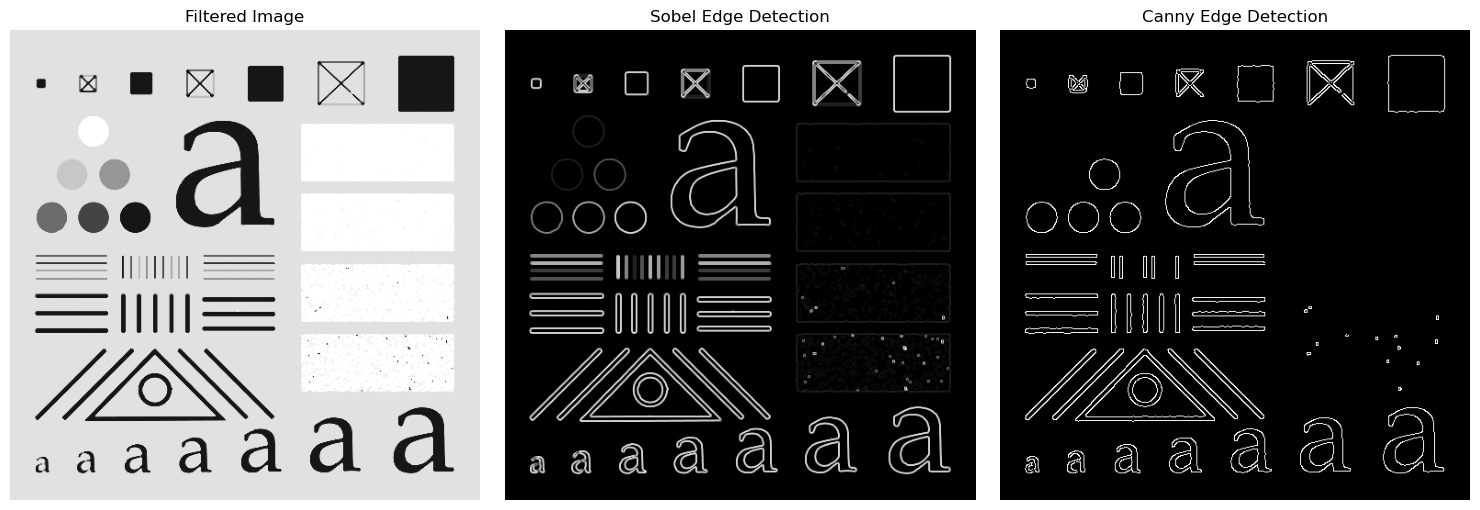

In [24]:
# Apply both methods
sobel_edges = sobel_edge_detection(filtered_img)
canny_edges = canny_edge_detection(filtered_img)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(133)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()